In [114]:
import time

import numpy as np

import jupyter_fix

jupyter_fix.fix_jupyter_path()

In [115]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
from tqdm import tqdm

from src.utility.keypoints_utilities import draw_skeleton, scale_points, mark_points_on_image, generate_keypoints_dataframe

In [116]:
img_path = '/home/jakub/Datasets/mpii/'
img_size = 128

In [117]:
# mpii_dataframe = generate_keypoints_dataframe()

mpii_dataframe = pd.read_csv('./data/mpii_with_keypoints.csv', index_col=0)

In [118]:
mpii_dataframe.name.count()

12221

In [119]:
mpii_dataframe = mpii_dataframe[mpii_dataframe != "-1"].dropna()

In [120]:
mpii_dataframe

,name,activity,category,person_count,r ankle,r knee,r hip,l hip,l knee,l ankle,pelvis,thorax,upper neck,head top,r wrist,r elbow,r shoulder,l shoulder,l elbow,l wrist
1,060111501.jpg,curling,sports,1,"(322, 980)","(318, 896)","(248, 865)","(226, 943)","(290, 948)","(349, 881)","(237, 904)","(135, 858)","(180.4244, 871.1877)","(58.5756, 835.8123)","(294, 772)","(247, 754)","(147, 792)","(123, 923)","(163, 995)","(223, 961)"
2,002058449.jpg,curling,sports,1,"(456, 918)","(518, 659)","(413, 713)","(288, 979)","(453, 1222)","(399, 974)","(351, 846)","(259, 738)","(314.8937, 795.2738)","(122.1063, 597.7262)","(490, 441)","(434, 446)","(270, 599)","(247, 877)","(384, 1112)","(489, 1012)"
7,036636184.jpg,"truck driving, loading and unloading truck, ty...",occupation,1,"(478, 525)","(369, 529)","(220, 517)","(204, 570)","(371, 574)","(480, 581)","(212, 544)","(76, 488)","(71.5436, 479.0873)","(28.4564, 392.9127)","(251, 416)","(201, 469)","(104, 459)","(48, 516)","(132, 588)","(242, 587)"
8,045606998.jpg,"truck driving, loading and unloading truck, ty...",occupation,1,"(370, 555)","(298, 568)","(255, 559)","(140, 645)","(343, 600)","(480, 610)","(198, 602)","(179, 515)","(181.3768, 508.3448)","(221.6232, 395.6552)","(361, 495)","(285, 470)","(170, 464)","(187, 566)","(230, 671)","(316, 591)"
12,060754485.jpg,"truck driving, loading and unloading truck, ty...",occupation,1,"(684, 694)","(579, 685)","(437, 670)","(421, 747)","(574, 751)","(717, 768)","(429, 709)","(230, 649)","(217.5659, 642.6337)","(117.4341, 591.3663)","(351, 488)","(307, 551)","(242, 600)","(217, 698)","(310, 767)","(405, 790)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12216,033474347.jpg,pushing car,transportation,1,"(461, 876)","(380, 815)","(296, 779)","(303, 742)","(386, 706)","(468, 739)","(300, 761)","(219, 684)","(204.2324, 671.7848)","(152.7676, 629.2152)","(243, 693)","(260, 726)","(214, 704)","(223, 663)","(286, 674)","(260, 631)"
12217,082650067.jpg,pushing car,transportation,1,"(656, 1038)","(504, 950)","(328, 903)","(337, 831)","(504, 811)","(637, 853)","(333, 867)","(212, 775)","(196.7913, 762.9653)","(112.2087, 696.0347)","(236, 815)","(273, 864)","(204, 821)","(220, 729)","(332, 704)","(269, 675)"
12218,072772110.jpg,pushing car,transportation,1,"(617, 562)","(539, 558)","(452, 553)","(458, 511)","(536, 529)","(610, 541)","(455, 532)","(378, 531)","(352.8365, 528.9869)","(303.1635, 525.0131)","(411, 558)","(393, 565)","(377, 572)","(378, 490)","(411, 470)","(414, 461)"
12219,039361034.jpg,pushing car,transportation,1,"(377, 496)","(322, 466)","(278, 510)","(280, 540)","(331, 558)","(368, 596)","(279, 525)","(252, 454)","(251.4431, 451.3169)","(241.5569, 403.6831)","(311, 378)","(288, 404)","(253, 441)","(251, 466)","(293, 436)","(325, 410)"


In [121]:
mpii_dataframe.category.unique()

array(['sports', 'occupation', 'home activities', 'lawn and garden',
       'winter activities', 'conditioning exercise', 'bicycling',
       'fishing and hunting', 'water activities', 'walking',
       'miscellaneous', 'running', 'music playing', 'home repair',
       'transportation', 'dancing', 'inactivity quiet/light',
       'volunteer activities', 'religious activities', 'self care'],
      dtype=object)

In [122]:
# mpii_dataframe[mpii_dataframe.activity == 'truck driving, loading and unloading truck, tying down load, standing, walking and carrying heavy lo']

In [128]:
activity_to_drop = [
    'truck driving, loading and unloading truck, tying down load, standing, walking and carrying heavy lo',
    'kayaking, moderate effort',
    'whitewater rafting, kayaking, or canoeing',
    'skindiving or SCUBA diving as a frogman, Navy Seal',
    'horseback riding',
    'piano, sitting',
    'ballroom',
    'motor scooter, motorcycle',
    'horse racing',
]
# 'sports', 'occupation',
cat_to_drop = ['home activities', 'walking', 'lawn and garden', 'conditioning exercise', 'running', 'inactivity quiet/light']

In [129]:
filtered_activities = mpii_dataframe[~mpii_dataframe.activity.isin(activity_to_drop)]

In [130]:
filtered_cats = filtered_activities[filtered_activities.category.isin(cat_to_drop)]

In [131]:
# filtered_cats =
filtered_cats = filtered_cats.reset_index()

In [132]:
len(filtered_cats)

2548

In [133]:
joints = filtered_cats.columns.to_list()[5:]
joints

['r ankle',
 'r knee',
 'r hip',
 'l hip',
 'l knee',
 'l ankle',
 'pelvis',
 'thorax',
 'upper neck',
 'head top',
 'r wrist',
 'r elbow',
 'r shoulder',
 'l shoulder',
 'l elbow',
 'l wrist']

In [134]:
filtered_cats[joints].iloc[1].to_list()

['(474, 369)',
 '(397, 406)',
 '(254, 406)',
 '(252, 471)',
 '(386, 461)',
 '(470, 448)',
 '(253, 439)',
 '(99, 441)',
 '(89.1831, 446.2789)',
 '(2.8169, 492.7211)',
 '(139, 489)',
 '(193, 432)',
 '(97, 404)',
 '(100, 477)',
 '(186, 496)',
 '(246, 533)']

In [135]:
filtered_cats['name'].iloc[0]

'018485446.jpg'

In [136]:
import ast

X = []
y = []

for idx in tqdm(range(len(filtered_cats))):
    img = cv2.cvtColor(cv2.imread(img_path + filtered_cats['name'].iloc[idx], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
    oy, ox, oc = img.shape

    X.append(cv2.resize(img, (img_size, img_size)))

    label_row = []
    for jnt in filtered_cats[joints].iloc[idx].to_list():
        current_joint = ast.literal_eval(jnt)
        current_joint = scale_points((img_size, img_size), (oy, ox), [current_joint])[0]
        label_row.append(current_joint[0])
        label_row.append(current_joint[1])
    y.append(label_row)


#         img = cv2.cvtColor(cv2.imread(img_path + names[i], cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)
#         oy, ox, oc = img.shape
#         y.append(scale_points((64, 64), (oy, ox), [crnt]))
#         X.append(cv2.resize(img, (64, 64)))

100%|██████████| 2548/2548 [00:44<00:00, 56.73it/s]


In [282]:
img_idx = 5

test_y = []

for i in range(0, len(y[img_idx]), 2):
    test_y.append((y[img_idx][i], y[img_idx][i+1]))

In [289]:
import skimage

_, hgg = skimage.feature.hog(X[img_idx],
                             visualize=True,
                             channel_axis=-1)

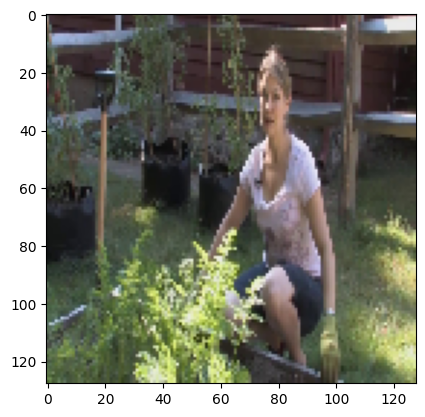

In [286]:
plt.imshow(hgg)

In [139]:
import skimage


def process_sample(x):
    return skimage.feature.hog(x,
                             visualize=False,
                             channel_axis=-1)

In [140]:
from joblib import Parallel, delayed

# X_hog = []

X_hog = Parallel(n_jobs=-2, verbose=1)(delayed(process_sample)(sample) for sample in X)

[Parallel(n_jobs=-2)]: Using backend LokyBackend with 15 concurrent workers.
[Parallel(n_jobs=-2)]: Done  20 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-2)]: Done 640 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-2)]: Done 2548 out of 2548 | elapsed:    4.0s finished


In [141]:
for j in joints:
    print('y_' + j.replace(' ', '_'))

y_r_ankle
y_r_knee
y_r_hip
y_l_hip
y_l_knee
y_l_ankle
y_pelvis
y_thorax
y_upper_neck
y_head_top
y_r_wrist
y_r_elbow
y_r_shoulder
y_l_shoulder
y_l_elbow
y_l_wrist


In [142]:
# import numpy as np
#
# new_new_y = []
#
# for item in new_y:
#     canvas = np.zeros(shape=(64, 64))
#     idxs = np.round(item).astype(int)
#     canvas[idxs[0], idxs[1]] = 1
#     new_new_y.append(canvas.flatten())

In [143]:
# plt.imshow(new_new_y[0].reshape(64, 64))

In [144]:
# from sklearn.model_selection import train_test_split
#
# X_train, X_test, y_train, y_test = train_test_split(X_hog, y, test_size=0.2, shuffle=True)

In [145]:
# y_r_ankle = []
# y_r_knee = []
# y_r_hip = []
# y_l_hip = []
# y_l_knee = []
# y_l_ankle = []
# y_pelvis = []
# y_thorax = []
# y_upper_neck = []
# y_head_top = []
# y_r_wrist = []
# y_r_elbow = []
# y_r_shoulder = []
# y_l_shoulder = []
# y_l_elbow = []
# y_l_wrist = []

y_joints = [list() for i in range(len(joints))]

for row in y:
    y_joints[0].append(row[0:2])
    y_joints[1].append(row[2:4])
    y_joints[2].append(row[4:6])
    y_joints[3].append(row[6:8])
    y_joints[4].append(row[8:10])
    y_joints[5].append(row[10:12])
    y_joints[6].append(row[12:14])
    y_joints[7].append(row[14:16])
    y_joints[8].append(row[16:18])
    y_joints[9].append(row[18:20])
    y_joints[10].append(row[20:22])
    y_joints[11].append(row[22:24])
    y_joints[12].append(row[24:26])
    y_joints[13].append(row[26:28])
    y_joints[14].append(row[28:30])
    y_joints[15].append(row[30:32])

In [146]:
y_joints[0]


[[115.31851851851852, 72.46666666666667],
 [126.39999999999999, 73.8],
 [107.46666666666667, 61.0],
 [105.6, 89.4],
 [113.42222222222223, 72.0],
 [115.02222222222223, 78.9],
 [108.20740740740742, 80.0],
 [106.39999999999999, 75.39110070257611],
 [121.06666666666666, 45.56440281030445],
 [118.39999999999999, 29.526932084309134],
 [114.13333333333333, 59.3536299765808],
 [113.06666666666666, 51.559718969555036],
 [104.53333333333333, 76.60000000000001],
 [65.42222222222223, 82.7],
 [115.02222222222223, 75.0],
 [60.266666666666666, 43.300000000000004],
 [97.06666666666668, 90.10000000000001],
 [31.28888888888889, 90.30000000000001],
 [104.53333333333333, 47.5],
 [103.11111111111111, 50.6],
 [71.73333333333333, 86.4],
 [80.26666666666667, 97.60000000000001],
 [101.33333333333333, 11.600000000000001],
 [106.13333333333333, 5.6000000000000005],
 [71.46666666666667, 74.8],
 [123.37777777777778, 60.5],
 [113.54074074074074, 62.0],
 [110.1037037037037, 66.33333333333333],
 [108.68148148148148, 

In [205]:
np_y_joints = np.asarray(y_joints)
np_y_joints

array([[[115.31851852,  72.46666667],
        [126.4       ,  73.8       ],
        [107.46666667,  61.        ],
        ...,
        [ 89.86666667,  38.6       ],
        [ 89.06666667,  38.4       ],
        [ 91.46666667,  42.6       ]],

       [[108.44444444,  43.8       ],
        [105.86666667,  81.2       ],
        [ 78.4       ,  62.6       ],
        ...,
        [ 77.06666667,  41.8       ],
        [ 76.8       ,  39.8       ],
        [ 75.46666667,  43.2       ]],

       [[ 95.05185185,  64.2       ],
        [ 67.73333333,  81.2       ],
        [ 53.86666667,  60.2       ],
        ...,
        [ 66.66666667,  33.8       ],
        [ 62.13333333,  37.        ],
        [ 61.06666667,  36.6       ]],

       ...,

       [[ 43.97037037,  84.66666667],
        [ 26.66666667,  95.4       ],
        [ 40.53333333,  83.6       ],
        ...,
        [ 51.73333333,  44.6       ],
        [ 42.13333333,  42.2       ],
        [ 49.06666667,  48.2       ]],

       [[ 87.94

In [281]:
plt.imshow(draw_skeleton(X[5], test_y[5], radius=1, thickness=1, color=(0, 0, 255)))

TypeError: 'float' object is not subscriptable

In [148]:
# y_train = np.asarray(y_train)

In [149]:
from sklearn.ensemble import RandomForestRegressor
#
# regr = RandomForestRegressor(n_estimators=500, verbose=1, n_jobs=-2)
# regr.fit(X_train, y_train)
#
# regr_y = RandomForestRegressor(verbose=1, n_jobs=-2)
# regr_y.fit(X_train, y_train[:, 0])
#
# regr_x = RandomForestRegressor(verbose=1, n_jobs=-2)
# regr_x.fit(X_train, y_train[:, 1])

In [150]:

regressors = [
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2),
    RandomForestRegressor(n_estimators=100, n_jobs=-2)
]

In [206]:
from sklearn.svm import LinearSVR

regressors_svr = [
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR(),
    LinearSVR()
]

In [212]:
len(np_y_joints)

16

In [238]:
from sklearn.preprocessing import StandardScaler

std = StandardScaler()

X_hog_scaled = std.fit_transform(X_hog)

In [239]:
kdx = 0

for i in tqdm(range(0, len(np_y_joints))):
    for j in tqdm(range(2)):
        regressors_svr[kdx].fit(X_hog_scaled, np_y_joints[i][:, j])
        kdx += 1

100%|██████████| 16/16 [30:01<00:00, 112.62s/it]


In [273]:
import joblib


def save_classifier(classifier, path, idx):
    file_name = str(idx) + "_" + str(classifier.__class__.__name__) + "_scaled"
    joblib.dump(classifier, path + file_name, compress=3)

In [274]:
for i in range(len(regressors_svr)):
    save_classifier(regressors_svr[i], "models/", i)

In [275]:
joblib.dump(std, "models/" + 'scaler', compress=3)

['models/scaler']

In [152]:
# regr_x = make_pipeline(StandardScaler(), RandomForestRegressor(verbose=1, n_jobs=-2))
# regr_x.fit(X_train, y_train[:, 1])

In [241]:
test_image = cv2.cvtColor(cv2.imread('./data/person.jpg', cv2.IMREAD_COLOR), cv2.COLOR_BGR2RGB)

In [242]:
oy, ox, oc = test_image.shape

In [243]:
test_image2 = cv2.resize(test_image, (img_size, img_size))

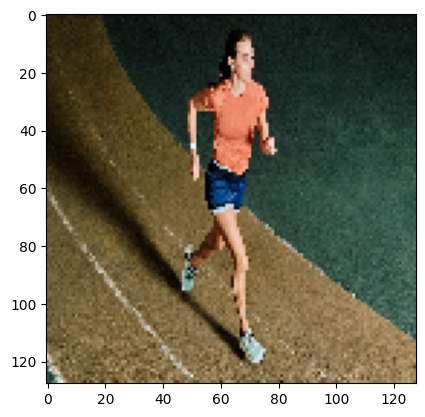

In [244]:
plt.imshow(test_image2)

In [245]:
test_hog, vis = skimage.feature.hog(test_image2,
                             visualize=True,
                             channel_axis=-1)

In [258]:
test_hog = std.transform([test_hog])

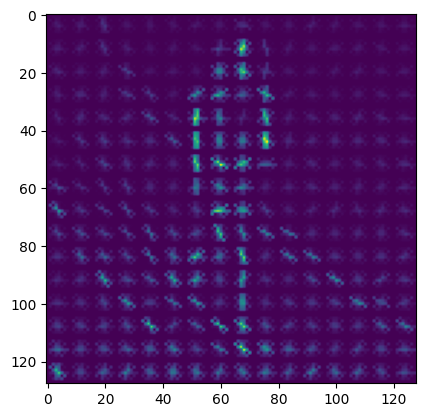

In [259]:
plt.imshow(vis)

In [260]:
test_hog.shape

(1, 15876)

In [264]:
# y_r_ankle_regr_predict = y_r_ankle_regr.predict([test_hog])

In [265]:
# y_r_ankle_regr_predict[0]

In [266]:
import time

st_time = time.perf_counter()

predicts = []

for i in range(0, len(regressors_svr), 2):
    predicts.append([regressors_svr[i].predict(test_hog)[0], regressors_svr[i + 1].predict(test_hog)[0], ])

In [267]:
# predicted = (predicted[0], predicted11[0])

In [268]:
# predict_fixed = []
#
# for i in range(0, len(predicted[0]), 2):
#     predict_fixed.append((predicted[0][i], predicted[0][i+1]))

In [269]:
# predicted2 = scale_points((oy, ox), (64, 64), [(predicted_y, predicted_x)])
# predicted2 = (predicted2[0][0][0], predicted2[0][1][0])
# predicted2

predicted3 = scale_points((oy, ox), (img_size, img_size), predicts)

In [270]:
# plt.imshow(mark_points_on_image(
#     mark_points_on_image(test_image, predicted3, radius=10, color=(255, 0, 0))
#     , [predicted2], radius=10, color=(0, 0, 0)))

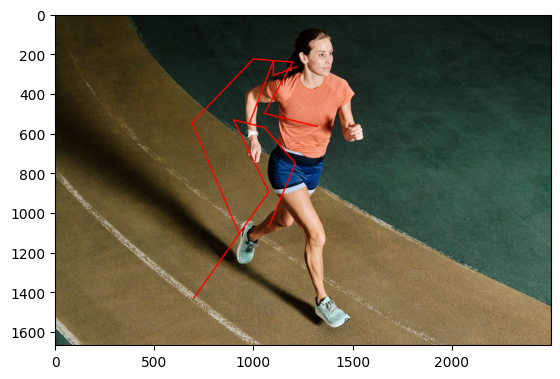

In [271]:
plt.imshow(draw_skeleton(test_image, predicted3, radius=1, color=(255, 0, 0)))

In [272]:
print(time.perf_counter() - st_time)

0.8670620060001966
